**AKTIVASI GOOGLE DRIVE**

In [66]:
from google.colab import drive
import os
import zipfile

# Tentukan path file zip
zip_path = '/content/DATASET.zip'  # Ganti dengan path file zip yang sesuai

# Ekstrak file zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')  # Ganti dengan folder tujuan ekstraksi yang diinginkan

# Menghubungkan ke Google Drive
#drive.mount('/content/drive')

# Menentukan path lengkap ke dataset di Google Drive
#dataset_dir = '/content/drive/MyDrive/DATASET'



**CEK FOLDER**

In [67]:
!ls "/content/"
# 

1	     download.jpg				       sample_data
DATASET      ikan-nila-berkhasiat-bikin-awet-muda-220728i.jpg
DATASET.zip  path


**SET DIRECTORY**

In [68]:
import os
base_dir = "/content/DATASET"


train_dir = os.path.join(base_dir, 'TRAIN')
validation_dir = os.path.join(base_dir, 'VALIDATION')


#TRAIN
train_whitespot_dir = os.path.join(train_dir, 'WHITESPOT')
#train_aeromonas_dir = os.path.join(train_dir, 'AEROMONAS')
train_backterialfin_dir = os.path.join(train_dir, 'BACTERIALFIN')
train_redspot_dir = os.path.join(train_dir, 'REDSPOT')
train_healthy_dir = os.path.join(train_dir, 'HEALTHY')

#VALIDATION
validation_whitespot_dir = os.path.join(train_dir, 'WHITESPOT')
#validation_aeromonas_dir = os.path.join(train_dir, 'AEROMONAS')
validation_backterialfin_dir = os.path.join(train_dir, 'BACTERIALFIN')
validation_redspot_dir = os.path.join(train_dir, 'REDSPOT')
validation_healthy_dir = os.path.join(train_dir, 'HEALTHY')

#TEST
#test_dir = os.path.join(base_dir, 'TEST')


In [69]:
print("Contents of base directory:")
print(os.listdir(base_dir))

Contents of base directory:
['TRAIN', 'VALIDATION', 'TEST']


**CEK ISI DATASET**

In [70]:
train_whitespot_fnames = os.listdir(train_whitespot_dir)
print(train_whitespot_fnames[:5])

#train_aeromonas_fnames = os.listdir(train_aeromonas_dir)
#print(train_aeromonas_fnames[:5])

train_bacterial_fnames = os.listdir(train_backterialfin_dir)
print(train_bacterial_fnames[:5])

#==========================================

print('total training WHITESPOT images:', len(os.listdir(train_whitespot_dir)))
#print('total training AEROMONAS images:', len(os.listdir(train_aeromonas_dir)))
print('total training BACTERIALFIN images:', len(os.listdir(train_backterialfin_dir)))
print('total training REDSPOT images:', len(os.listdir(train_redspot_dir)))
print('total training HEALTHY images:', len(os.listdir(train_healthy_dir)))

['images (5).jpg', '2.JPG', 'images (6).jpg', 'download (10).jpg', 'images (8).jpg']
['A.jfif', '4.JPG', 'motile-aeromonas-septicemia.JPG', '1.JPG']
total training WHITESPOT images: 32
total training BACTERIALFIN images: 4
total training REDSPOT images: 23
total training HEALTHY images: 16


In [71]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Membuat objek ImageDataGenerator dengan konfigurasi augmentasi gambar
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Skala piksel ke range 0-1
    rotation_range=5,  # Rotasi gambar dalam range 20 derajat
    width_shift_range=0.1,  # Geser gambar secara horizontal
    height_shift_range=0.1,  # Geser gambar secara vertikal
    shear_range=0.1,  # Menggeser gambar secara shear
    zoom_range=0.1,  # Perbesar/perkecil gambar
    horizontal_flip=True,  # Flip gambar secara horizontal
    vertical_flip=True  # Flip gambar secara vertikal
)

# Menggunakan objek ImageDataGenerator untuk memuat dan augmentasi data pelatihan
train_generator = train_datagen.flow_from_directory(
    '/content/DATASET/TRAIN',
    target_size=(224, 224),  # Ukuran gambar yang diharapkan
    # Jumlah sampel dalam setiap batch
    class_mode='categorical'  # Mode klasifikasi multikelas
)


Found 69 images belonging to 4 classes.


In [72]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout
# Membangun model CNN
model = tf.keras.Sequential()

# Layer konvolusi pertama
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))




# Layer konvolusi kedua
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


# Layer konvolusi ketiga
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))




# Layer konvolusi keempat
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))


# Layer flatten
model.add(layers.Flatten())

# Layer fully connected
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))

# Layer output
model.add(layers.Dense(4, activation='softmax'))

# Menampilkan ringkasan model
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 26, 26, 128)     

In [75]:
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.callbacks import Callback

image_width = 224
image_height = 224
batch_size= 64 # Jumlah sampel dalam setiap batch


validation_datagen = ImageDataGenerator(rescale=1./255)
# Definisikan validation data generator
val_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical')

# Definisikan optimizer kompleks
optimizer = Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
   
)


#Callback
class StopTrainingCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.9 and logs.get('val_accuracy') >= 0.96:
            print("\nTraining stopped as desired accuracy achieved!")
            self.model.stop_training = True


# Mengompilasi model dengan optimizer kompleks
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Melatih model dan mendapatkan objek history
history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=80, validation_data=val_generator, validation_steps=len(val_generator), callbacks=[StopTrainingCallback()])









Found 69 images belonging to 4 classes.
Epoch 1/80
3/3 [==============================] - 19s 6s/step - loss: 1.1076 - accuracy: 0.5942 - val_loss: 0.6503 - val_accuracy: 0.7681
Epoch 2/80
3/3 [==============================] - 16s 5s/step - loss: 0.8106 - accuracy: 0.6232 - val_loss: 0.6287 - val_accuracy: 0.6957
Epoch 3/80
3/3 [==============================] - 14s 6s/step - loss: 0.6141 - accuracy: 0.7246 - val_loss: 0.5390 - val_accuracy: 0.7391
Epoch 4/80
3/3 [==============================] - 17s 5s/step - loss: 0.6041 - accuracy: 0.7536 - val_loss: 0.8529 - val_accuracy: 0.7681
Epoch 5/80
3/3 [==============================] - 17s 6s/step - loss: 0.6462 - accuracy: 0.7681 - val_loss: 0.5148 - val_accuracy: 0.8116
Epoch 6/80
3/3 [==============================] - 17s 5s/step - loss: 0.6035 - accuracy: 0.7826 - val_loss: 0.4346 - val_accuracy: 0.8261
Epoch 7/80
3/3 [==============================] - 17s 6s/step - loss: 0.5452 - accuracy: 0.8116 - val_loss: 0.3736 - val_accuracy: 0

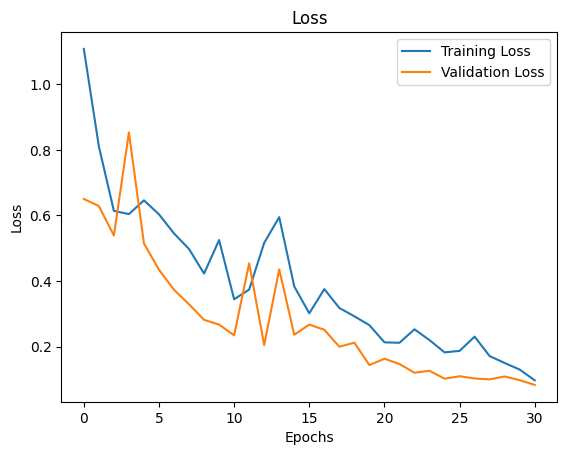

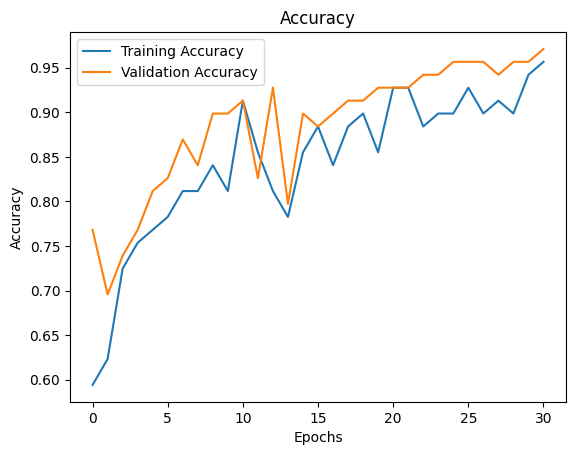

In [76]:
# Membuat plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Membuat plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**==========================SAVE MODEL==========================**

In [77]:
from tensorflow.keras.models import save_model

def save_model_to_file(model, file_path):
    """
    Menyimpan model ke file.
    
    Args:
        model (tf.keras.Model): Model yang akan disimpan.
        file_path (str): Path file untuk menyimpan model.
    """
    save_model(model, file_path)
    print(f"Model berhasil disimpan ke file: {file_path}")


In [78]:
# Simpan model ke file
save_model_to_file(model, 'path/to/model.h5')

Model berhasil disimpan ke file: path/to/model.h5


**==========================PREDIKSI MODEL ==========================**

In [81]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model('/content/path/to/model.h5')


def preprocess_image(image_path, target_size):
    img = image.load_img(image_path, target_size=target_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize gamabr
    return img


def predict_image(image_path, target_size):
    img = preprocess_image(image_path, target_size)
    pred = model.predict(img)
    class_indices = train_generator.class_indices
    predicted_class = list(class_indices.keys())[np.argmax(pred)]
    confidence = np.max(pred) * 100
    return predicted_class, confidence


image_path = '/content/download.jpg'
target_size = (224, 224)  #target

predicted_class, confidence = predict_image(image_path, target_size)
print('Hasil Prediksi Kemungkinan :', predicted_class)
print('Dalam %:', confidence)


1/1 [==============================] - 0s 150ms/step
Hasil Prediksi Kemungkinan : REDSPOT
Dalam %: 99.9528169631958
